# Image Processing Using Opencv
---
### Install Opencv
- Example on MacOS
```console  
$ pip3 --version
pip 24.0 from /opt/anaconda3/lib/python3.12/site-packages/pip (python 3.12)
$ python3 --version
Python 3.12.4
$ pip3 install opencv-python
Collecting opencv-python
  Downloading opencv-python-4.11.0.86.tar.gz (95.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 MB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Requirement already satisfied: numpy>=1.21.2 in /opt/anaconda3/lib/python3.12/site-packages (from opencv-python) (1.26.4)
Building wheels for collected packages: opencv-python
  Building wheel for opencv-python (pyproject.toml) ... done
  Created wheel for opencv-python: filename=opencv_python-4.11.0.86-cp312-cp312-macosx_10_16_x86_64.whl size=27595148 sha256=0fc6f3f12d5b5f0a5a54d870de9e866aaf59484b11dfcce77a8aece5a4f393e9
  Stored in directory: /Users/bshen2/Library/Caches/pip/wheels/be/bd/d5/425eca52f204ab4b1ad7ac23c79e7a0458ee178056e4350265
Successfully built opencv-python
Installing collected packages: opencv-python
Successfully installed opencv-python-4.11.0.86
```
---
### Filtering through Convolution
Let's use convolution for the following image processing:
- Edge Detection
- Feature Extraction
- Blurring &rarr; Scaling

### Import resources and display image

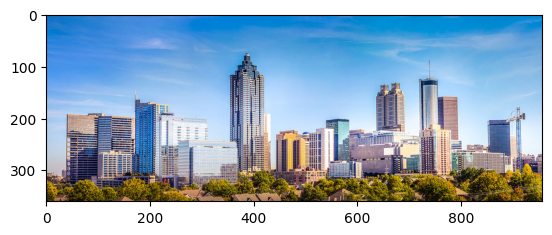

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('building2.jpg')

plt.imshow(image)

### Convert the image to grayscale

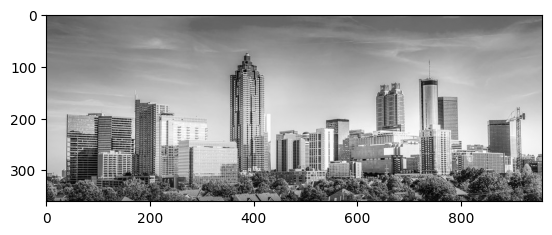

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### Convolution Through a Kernel

Image convolution is a mathematical operation where a small matrix (called a kernel or filter) slides over an image, performing element-wise multiplications and summing the results to produce a new pixel value. This process helps extract features such as edges, textures, and patterns by emphasizing specific spatial structures in the image. Convolution is widely used in image processing and deep learning, particularly in convolutional neural networks (CNNs) for feature detection.

Here we practice applying image convolution using traditional image processing operations.
1. **Select a Kernel (Filter):** Choose a small matrix (e.g., 3x3 or 5x5) with predefined values for a specific operation (e.g., edge detection, blurring).  

2. **Slide the Kernel Over the Image:** Move the kernel across the image, covering one region at a time.  

3. **Compute the Element-Wise Product:** Multiply each value in the kernel with the corresponding pixel values in the image region.  

4. **Sum the Products:** Add up all the multiplied values to obtain a single new pixel value.  

5. **Store the Result:** Place the computed value into the corresponding location in the output image.  

6. **Repeat for Entire Image:** Continue the process by shifting the kernel until every pixel has been processed.

Here is a common 3×3 kernel for edge detection, which detects edges in a specific direction, vertical and horizontal:

**Vertical Edge Detection Kernel:**
>$
K_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
$

**Horizontal Edge Detection Kernel:**
>$
K_y =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}
$

These kernels are convolved with an image to highlight vertical and horizontal edges, respectively.

Applying a filter like this to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately.

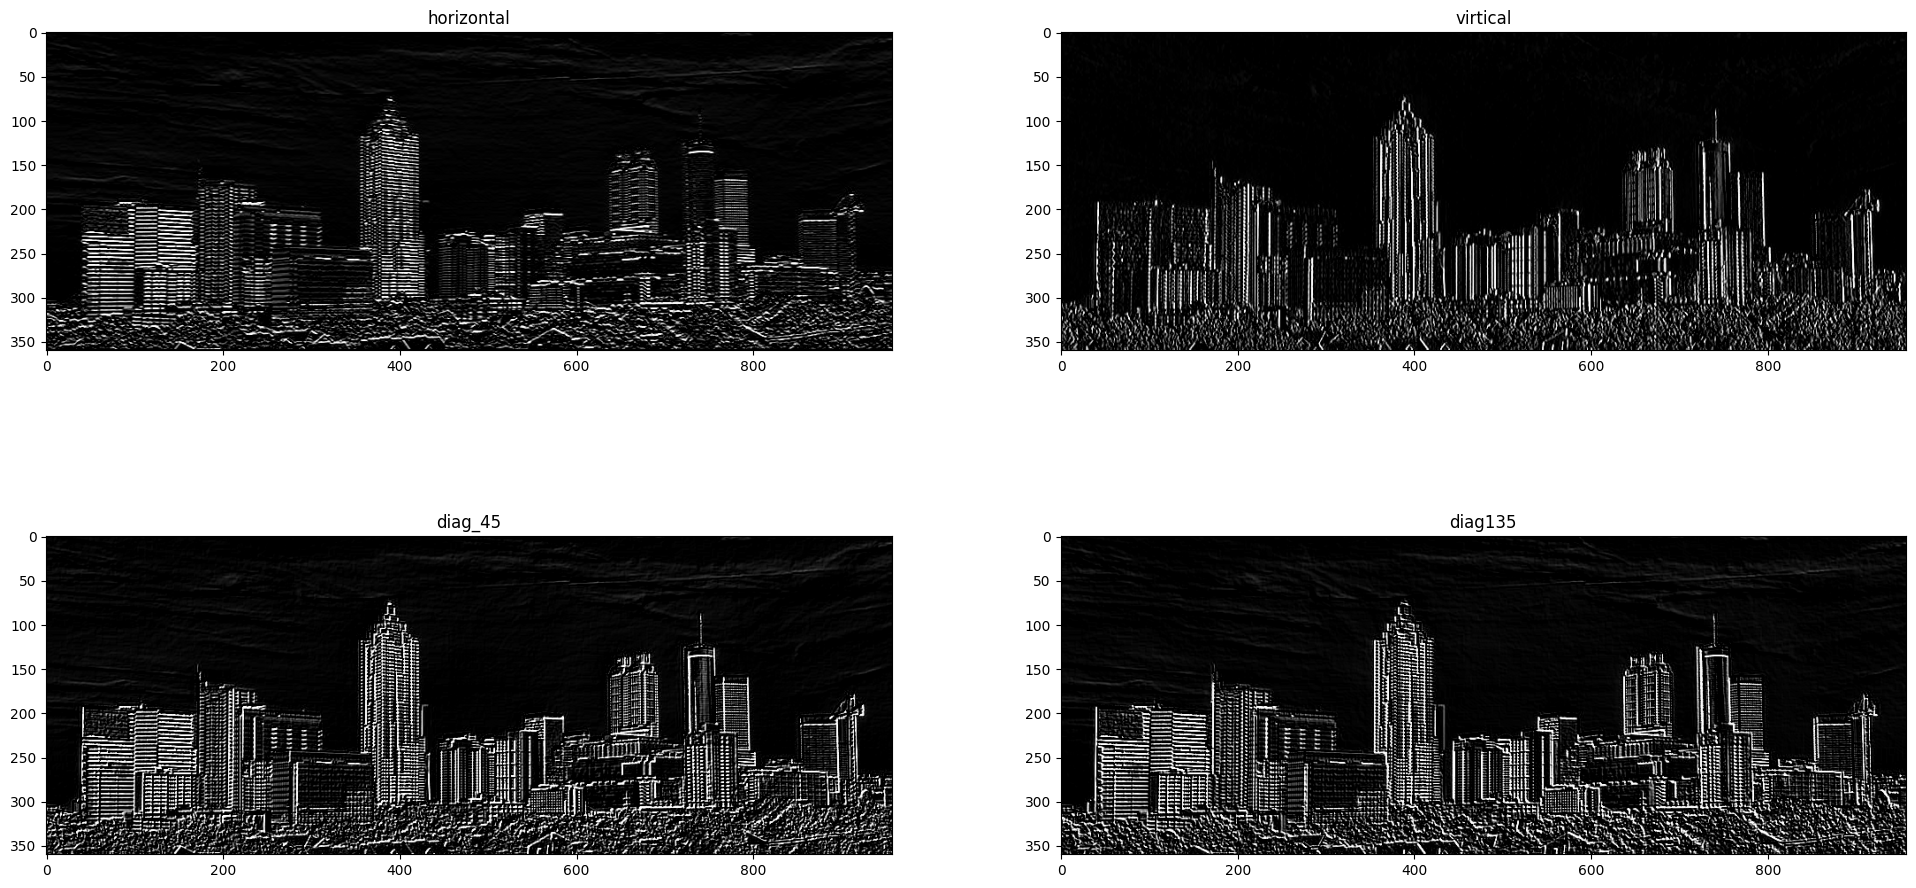

In [3]:
# Create a custom kernel

# 3x3 array for edge detection
horizon = np.array([[ -1, -1, -1],
                    [  0,  0,  0],
                    [  1,  1,  1]])

## TODO: Create and apply a vertical edge detection operator
vertica = np.array([[ -1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])

diag_45 = np.array([[ -2, -1, 0],
                    [ -1,  0, 1],
                    [  0,  1, 2]])

diag135 = np.array([[ 0, -1, -2],
                    [ 1,  0, -1],
                    [ 2,  1,  0]])

fig = plt.figure(figsize=(24,24))
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.filter2D(gray, -1, horizon)
fig.add_subplot(2,2,1)
plt.imshow(filtered_image, cmap='gray')
plt.title('horizontal')

filtered_image2 = cv2.filter2D(gray, -1, vertica)
fig.add_subplot(2,2,2)
plt.imshow(filtered_image2, cmap='gray')
plt.title('virtical')

filtered_image3 = cv2.filter2D(gray, -1, diag_45)
fig.add_subplot(1,2,1)
plt.imshow(filtered_image3, cmap='gray')
plt.title('diag_45')

filtered_image4 = cv2.filter2D(gray, -1, diag135)
fig.add_subplot(1,2,2)
plt.imshow(filtered_image4, cmap='gray')
plt.title('diag135')

plt.show()

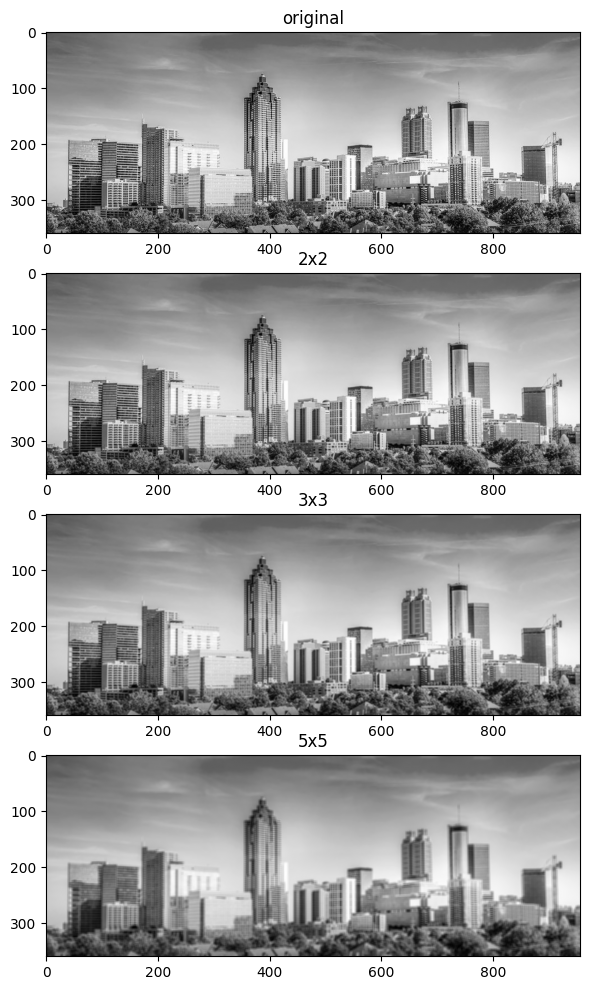

In [4]:
# Create a custom kernel for blurring

# 2x2 kernel for averaging blurring
S2x2 = np.array([[ 1, 1],
                 [ 1, 1]])

fig = plt.figure(figsize=(48, 12))
fig.add_subplot(4,1,1)
plt.imshow(gray, cmap='gray')
plt.title('original')

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
blurred_image = cv2.filter2D(gray, -1, S2x2/4.0)
fig.add_subplot(4,1,2)
plt.imshow(blurred_image, cmap='gray')
plt.title('2x2')

# TODO: blur image using a 3x3 average
# Create a 3x3 kernel for averaging
S3x3 = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])
blurred_image3 = cv2.filter2D(gray, -1, S3x3 / 9.0)
fig.add_subplot(4,1,3)
plt.imshow(blurred_image3, cmap='gray')
plt.title('3x3')

# TODO: blur image using a 5x5 average
S5x5 = np.ones((5,5))  # This creates a 5x5 array of ones
blurred_image5 = cv2.filter2D(gray, -1, S5x5 / 25.0)
fig.add_subplot(4,1,4)
plt.imshow(blurred_image5, cmap='gray')
plt.title('5x5')

plt.show()

### TODO

Other image processing/filtering you can try:
- Other Edge Detector (e.g. Sobel Operator)
A common 3×3 kernel for edge detection is the **Sobel operator**, which detects edges in a specific direction. Below are the Sobel kernels for detecting vertical and horizontal edges:

**Vertical Edge Detection Kernel:**
> $
K_x =
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$

**Horizontal Edge Detection Kernel:**
> $
K_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$

These kernels are convolved with an image to highlight vertical and horizontal edges, respectively.

- Corner Detection (use the kernels we discussed in slides)
- Scaling (after the blurring, can you pick one pixel out of the following?)
  - 2x2
  - 4x4
- Use other images of your choice
- For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

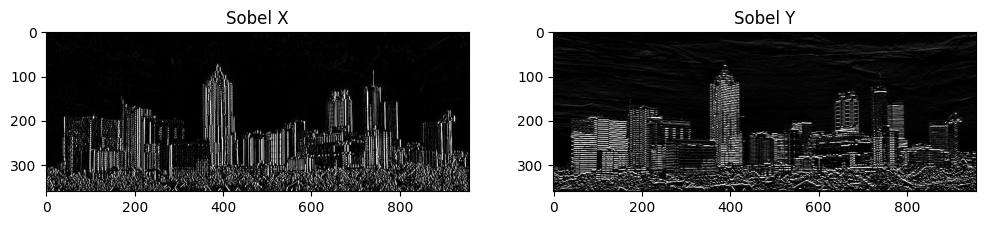

In [6]:
#Sobel Edge Detection (New Edge Detector)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]])

sobel_x_filtered = cv2.filter2D(gray, -1, sobel_x)
sobel_y_filtered = cv2.filter2D(gray, -1, sobel_y)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
plt.imshow(sobel_x_filtered, cmap='gray')
plt.title('Sobel X')

fig.add_subplot(1,2,2)
plt.imshow(sobel_y_filtered, cmap='gray')
plt.title('Sobel Y')

plt.show()


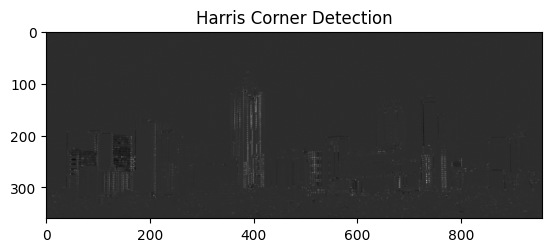

In [7]:
#Corner Detection
corners = cv2.cornerHarris(gray, 2, 3, 0.04)
plt.imshow(corners, cmap='gray')
plt.title('Harris Corner Detection')
plt.show()

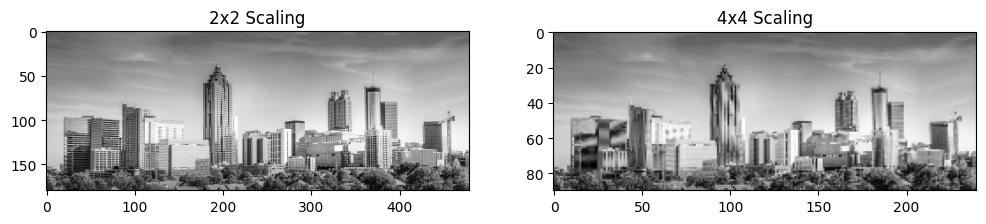

In [8]:
# Scaling (After Blurring)
scaled_2x2 = blurred_image[::2, ::2]  # Pick every second pixel
scaled_4x4 = blurred_image[::4, ::4]  # Pick every fourth pixel

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
plt.imshow(scaled_2x2, cmap='gray')
plt.title('2x2 Scaling')

fig.add_subplot(1,2,2)
plt.imshow(scaled_4x4, cmap='gray')
plt.title('4x4 Scaling')

plt.show()

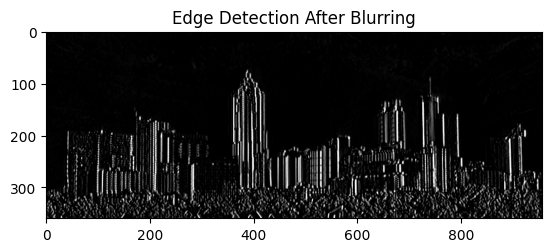

In [9]:
# Apply Multiple Filters in a Sequence
blurred = cv2.filter2D(gray, -1, S3x3 / 9.0)
edges_after_blur = cv2.filter2D(blurred, -1, sobel_x)

plt.imshow(edges_after_blur, cmap='gray')
plt.title('Edge Detection After Blurring')
plt.show()